In [1]:
import contextlib

import graphcat

def sample_graph(graph):
    graph.add_task("A")
    graph.add_task("B")
    graph.add_task("C")
    graph.add_task("D")
    graph.add_task("E")
    graph.add_task("F")
    graph.add_task("G", graphcat.raise_exception(RuntimeError()))

    graph.set_links("A", "B")
    graph.set_links("B", "D")
    graph.set_links("C", "D")
    graph.set_links("D", ["E", "G"])
    graph.set_links("E", "F")

    return graph    

graph = sample_graph(graphcat.StaticGraph())

The easiest way to visualize our new graph is to use Graphcat's builtin functionality to display it in a notebook:

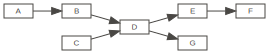

In [2]:
import graphcat.notebook
graphcat.notebook.display(graph)

The diagram represents each task as a box labelled with the task name.  Arrows point in the direction of data flow, from upstream nodes to the downstream nodes that depend on them.  The nodes are drawn as outlines because they haven't been executed yet:

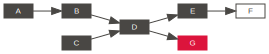

In [3]:
graph.update("E")
with contextlib.suppress(RuntimeError):
    graph.update("G")
graphcat.notebook.display(graph)

As you can see, the nodes that executed successfully are drawn as solid boxes, to suggest that they're finished, while failed nodes (nodes that raise an exception), are highlighted in red.

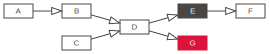

In [4]:
graph = sample_graph(graphcat.DynamicGraph())

graph.update("E")
with contextlib.suppress(RuntimeError):
    graph.update("G")

graphcat.notebook.display(graph)

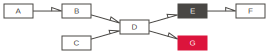

In [5]:
graph = sample_graph(graphcat.StreamingGraph())

graph.update("E", extent=None)
with contextlib.suppress(RuntimeError):
    graph.update("G", extent=None)

graphcat.notebook.display(graph)

You can see that the streaming graph arrows are drawn as outlined half arrows, to suggest that the streaming graph is dynamic *and* that downstream nodes can request partial results from upstream nodes.

Now that we've seen the default behavior for diagrams, let's look at the ways with which we can customize them.

First, depending on the size of your graph, the lengths of its task names, and the width of your screen, you may wish to display the graph with the data flowing top-to-bottom instead of the default left-to-right:

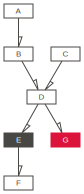

In [6]:
graphcat.notebook.display(graph, rankdir="TB")

Depending on the reading direction of your language, you might also prefer right-to-left flow:

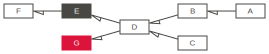

In [7]:
graphcat.notebook.display(graph, rankdir="RL")

You could also render the flow bottom-to-top, if you've been working on your [Tagbanwa](https://en.wikipedia.org/wiki/Tagbanwa_script):

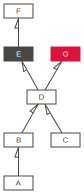

In [8]:
graphcat.notebook.display(graph, rankdir="BT")

In [9]:
import graphcat.diagram

In [10]:
agraph = graphcat.diagram.draw(graph)

In [11]:
agraph.get_node("C").attr.update(color="royalblue", fillcolor="royalblue", fontcolor="white", shape="circle")

To render the modified graph, we just need a little boilerplate:

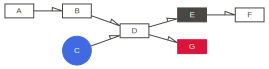

In [12]:
import IPython.display
IPython.display.display(IPython.display.SVG(data=agraph.draw(prog="dot", format="svg")))

You could also highlight an important relationship:

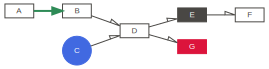

In [13]:
agraph.get_edge("A", "B").attr.update(color="seagreen", penwidth="2", arrowhead="normal")
IPython.display.display(IPython.display.SVG(data=agraph.draw(prog="dot", format="svg")))

Or you could add a supplemental label to a task:

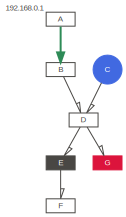

In [14]:
agraph.get_node("A").attr.update(xlabel="192.168.0.1")
agraph.graph_attr["rankdir"] = "TB"
IPython.display.display(IPython.display.SVG(data=agraph.draw(prog="dot", format="svg")))